In [21]:
# matplotlib.org/cheatsheets/
import pandas as pd 
from datasets import load_dataset 
import matplotlib.pyplot as plt
import ast
# load data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

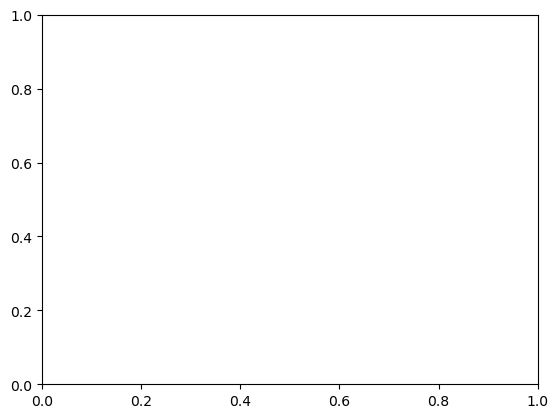

In [22]:
# provide fig and axes for 1*1 

fig, ax = plt.subplots()

df['job_title_short'].value_counts()

In [23]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

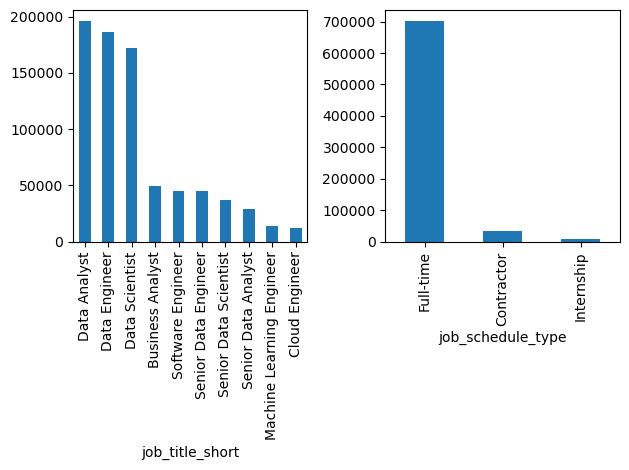

In [ ]:
fig, ax = plt.subplots(1, 2)
df['job_title_short'].value_counts().plot(kind= 'bar', ax = ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax = ax[1])
fig.tight_layout() # fixed all figure properly like legend and everything - with no overlapping 

In [25]:
# apply tight layout - to fix the figure (entire figure)
fig.tight_layout()

In [35]:
# COUNT of top skills in job postings 

df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skill_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skill_count = skill_count.reset_index(name = 'skill_count')
df_skill_count.sort_values(by = 'skill_count', ascending = False, inplace = True)
df_skill_count



,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


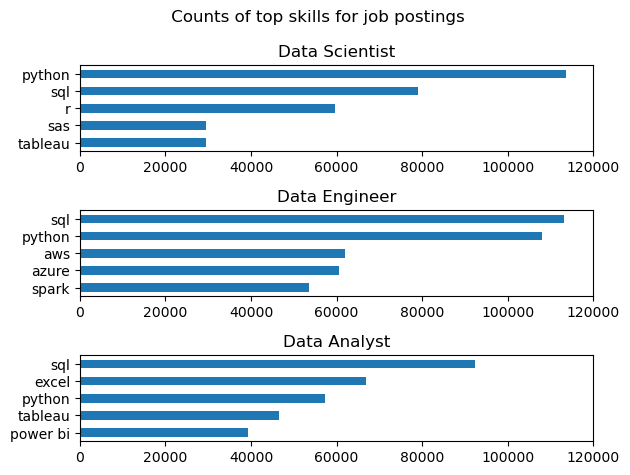

In [47]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_plot = (df_skill_count[df_skill_count['job_title_short'] == job_title].head(5))
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skill_count', ax = ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    # to set x axis limit properly 
    ax[i].set_xlim(0,120000)

    fig.suptitle(' Counts of top skills for job postings')
    fig.tight_layout()